<a href="https://colab.research.google.com/github/zamzfz/data-mining-credit_germany/blob/master/Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score

In [0]:
# Membaca dataset air bnb dan memasukannya kedalam data frame
# pd.set_option('display.max_rows', df.shape[0])

df = pd.read_csv('credit-g_csv.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [4]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,4,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,4,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,4,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,4,no known property,23,none,for free,1,skilled,1,yes,yes,bad


In [0]:
df['credit_history'].unique()
df.loc[df['credit_history']=='critical/other existing credit', 'credit_history'] = 0
df.loc[df['credit_history']=='existing paid', 'credit_history'] = 1
df.loc[df['credit_history']=='delayed previously', 'credit_history'] = 2
df.loc[df['credit_history']=='no credits/all paid', 'credit_history'] = 3
df.loc[df['credit_history']=='all paid', 'credit_history'] = 4

In [0]:
df['housing'].unique()

df.loc[df['housing']=='own', 'housing'] = 2
df.loc[df['housing']=='for free', 'housing'] = 1
df.loc[df['housing']=='rent', 'housing'] = 0

In [0]:
df['job'].unique()

df.loc[df['job']=='skilled', 'job'] = 2
df.loc[df['job']=='unskilled resident', 'job'] = 1
df.loc[df['job']=='high qualif/self emp/mgmt', 'job'] = 3
df.loc[df['job']=='unemp/unskilled non res', 'job'] = 0

In [0]:
df['property_magnitude'].unique()


df.loc[df['property_magnitude']=='no known property', 'property_magnitude'] = 0
df.loc[df['property_magnitude']=='car', 'property_magnitude'] = 1
df.loc[df['property_magnitude']=='life insurance', 'property_magnitude'] = 2
df.loc[df['property_magnitude']=='real estate', 'property_magnitude'] = 3

In [0]:
df['foreign_worker'].unique()

df.loc[df['foreign_worker']=='no', 'foreign_worker'] = 0
df.loc[df['foreign_worker']=='yes', 'foreign_worker'] = 1

In [0]:
df['other_payment_plans'].unique()


df.loc[df['other_payment_plans']=='none', 'other_payment_plans'] = 0
df.loc[df['other_payment_plans']=='stores', 'other_payment_plans'] = 1
df.loc[df['other_payment_plans']=='bank', 'other_payment_plans'] = 2

In [0]:
df['personal_status'].unique()

df.loc[df['personal_status']=='male single', 'personal_status'] = 0
df.loc[df['personal_status']=='male div/sep', 'personal_status'] = 1
df.loc[df['personal_status']=='male mar/wid', 'personal_status'] = 2
df.loc[df['personal_status']=='female div/dep/mar', 'personal_status'] = 3

In [0]:
df['employment'].unique()


df.loc[df['employment']=='unemployed', 'employment'] = 0
df.loc[df['employment']=='<1', 'employment'] = 1
df.loc[df['employment']=='1<=X<4', 'employment'] = 2
df.loc[df['employment']=='4<=X<7', 'employment'] = 3
df.loc[df['employment']=='>=7', 'employment'] = 4

In [0]:
df['savings_status'].unique()

df.loc[df['savings_status']=='no known savings', 'savings_status'] = 0
df.loc[df['savings_status']=='<100', 'savings_status'] = 1
df.loc[df['savings_status']=='100<=X<500', 'savings_status'] = 2
df.loc[df['savings_status']=='500<=X<1000', 'savings_status'] = 3
df.loc[df['savings_status']=='>=1000', 'savings_status'] = 4

In [0]:
df['purpose'].unique()


df.loc[df['purpose']=='other', 'purpose'] = 0
df.loc[df['purpose']=='radio/tv', 'purpose'] = 1
df.loc[df['purpose']=='education', 'purpose'] = 2
df.loc[df['purpose']=='new car', 'purpose'] = 3
df.loc[df['purpose']=='used car', 'purpose'] = 4
df.loc[df['purpose']=='repairs', 'purpose'] = 5
df.loc[df['purpose']=='furniture/equipment', 'purpose'] = 6
df.loc[df['purpose']=='retraining', 'purpose'] = 7
df.loc[df['purpose']=='business', 'purpose'] = 8
df.loc[df['purpose']=='domestic appliance', 'purpose'] = 9



In [0]:
df['other_parties'].unique()

df.loc[df['other_parties']=='none', 'other_parties'] = 0
df.loc[df['other_parties']=='guarantor', 'other_parties'] = 2
df.loc[df['other_parties']=='co applicant', 'other_parties'] = 1

In [139]:
df['property_magnitude'].unique()

array([3, 2, 0, 1], dtype=object)

In [0]:
df['own_telephone'].unique()

df.loc[df['own_telephone']=='yes', 'own_telephone'] = 1
df.loc[df['own_telephone']=='none', 'own_telephone'] = 0

In [141]:
df['residence_since'].unique()

array([4, 2, 3, 1])

In [0]:
df['checking_status'].unique()
df.loc[df['checking_status']=='<0', 'checking_status'] = 1
df.loc[df['checking_status']=='0<=X<200', 'checking_status'] = 2
df.loc[df['checking_status']=='no checking', 'checking_status'] = 0
df.loc[df['checking_status']=='>=200', 'checking_status'] = 3


In [0]:
# df.loc[df['class']=='good', 'class'] = 1
# df.loc[df['class']=='bad', 'class'] = 0

In [0]:
from sklearn import preprocessing

data = df.loc[:,['duration','credit_amount']]

x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled)

In [144]:
x_scaled

,0,1
0,0.029412,0.050567
1,0.647059,0.313690
2,0.117647,0.101574
3,0.558824,0.419941
4,0.294118,0.254209
...,...,...
995,0.117647,0.081765
996,0.382353,0.198470
997,0.117647,0.030483
998,0.602941,0.087763


In [0]:
df['duration'] = x_scaled[0]
df['credit_amount'] = x_scaled[1]

In [23]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,0.029412,0,1,0.050567,0,4,4,0,0,4,3,67,0,2,2,2,1,1,1,good
1,2,0.647059,1,1,0.313690,1,2,2,3,0,2,3,22,0,2,1,2,1,0,1,bad
2,0,0.117647,0,2,0.101574,1,3,2,0,0,3,3,49,0,2,1,1,2,0,1,good
3,1,0.558824,1,6,0.419941,1,3,2,0,2,4,2,45,0,1,1,2,2,0,1,good
4,1,0.294118,2,3,0.254209,1,2,3,0,0,4,0,53,0,1,2,2,2,0,1,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0.117647,1,6,0.081765,1,3,3,3,0,4,3,31,0,2,1,1,1,0,1,good
996,1,0.382353,1,4,0.198470,1,2,4,1,0,4,2,40,0,2,1,3,1,1,1,good
997,0,0.117647,1,1,0.030483,1,4,4,0,0,4,1,38,0,2,1,2,1,0,1,good
998,1,0.602941,1,1,0.087763,1,2,4,0,0,4,0,23,0,1,1,2,1,1,1,bad


In [0]:
# X = df.drop(columns=['class','checking_status','own_telephone','duration','credit_history','purpose','credit_amount','savings_status','employment','installment_commitment','personal_status','other_parties','residence_since','property_magnitude','other_payment_plans','housing','existing_credits','job','num_dependents']) 
# X = df.drop(columns=['class','checking_status','own_telephone','foreign_worker','credit_history','purpose','savings_status','employment','personal_status','other_parties','property_magnitude','other_payment_plans','housing','job']) 
X = df.drop(columns=['class']) 
# X = df.drop(columns=['class','age','foreign_worker','checking_status','own_telephone','credit_history','purpose','savings_status','employment','installment_commitment','personal_status','other_parties','residence_since','property_magnitude','other_payment_plans','housing','existing_credits','job','num_dependents']) 


In [0]:
pd.set_option('display.max_rows', 10)

In [26]:
X

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,1,0.029412,0,1,0.050567,0,4,4,0,0,4,3,67,0,2,2,2,1,1,1
1,2,0.647059,1,1,0.313690,1,2,2,3,0,2,3,22,0,2,1,2,1,0,1
2,0,0.117647,0,2,0.101574,1,3,2,0,0,3,3,49,0,2,1,1,2,0,1
3,1,0.558824,1,6,0.419941,1,3,2,0,2,4,2,45,0,1,1,2,2,0,1
4,1,0.294118,2,3,0.254209,1,2,3,0,0,4,0,53,0,1,2,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0.117647,1,6,0.081765,1,3,3,3,0,4,3,31,0,2,1,1,1,0,1
996,1,0.382353,1,4,0.198470,1,2,4,1,0,4,2,40,0,2,1,3,1,1,1
997,0,0.117647,1,1,0.030483,1,4,4,0,0,4,1,38,0,2,1,2,1,0,1
998,1,0.602941,1,1,0.087763,1,2,4,0,0,4,0,23,0,1,1,2,1,1,1


In [0]:
y = df['class'].values


In [107]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer,accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

scoring = ['accuracy','precision_macro', 'recall_macro', 'f1_macro','roc_auc']
nb = GaussianNB()
scores = cross_validate(nb, X, y,cv=10, scoring=scoring)

print(scores['test_accuracy'])
print(scores['test_precision_macro'])
print(scores['test_recall_macro'])
print(scores['test_f1_macro'])
print(scores['test_roc_auc'])


[0.74 0.7  0.74 0.69 0.73 0.75 0.65 0.73 0.71 0.7 ]
[0.70373514 0.65151515 0.69607843 0.63794663 0.67503805 0.70336606
 0.59271823 0.67727052 0.66056083 0.66666667]
[0.72857143 0.66190476 0.70952381 0.6452381  0.66428571 0.70714286
 0.59761905 0.67380952 0.66904762 0.69047619]
[0.71033868 0.65533088 0.70128676 0.64082957 0.6687523  0.70515391
 0.594485   0.67544176 0.66400185 0.67032967]
[0.79095238 0.71047619 0.77738095 0.71761905 0.76095238 0.77714286
 0.64095238 0.78142857 0.72238095 0.76333333]


In [148]:
from sklearn.linear_model import LogisticRegression

scoring = ['accuracy','precision_macro', 'recall_macro', 'f1_macro','roc_auc']

lr = LogisticRegression()

scores = cross_validate(lr, X, y,cv=10, scoring=scoring)

print(scores['test_accuracy'])
print(scores['test_precision_macro'])
print(scores['test_recall_macro'])
print(scores['test_f1_macro'])
print(scores['test_roc_auc'])


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.72 0.65 0.72 0.71 0.76 0.75 0.65 0.78 0.67 0.76]
[0.65780731 0.51960784 0.65582656 0.6372549  0.75568182 0.72546419
 0.54223522 0.75745257 0.54862953 0.71875   ]
[0.59047619 0.51190476 0.60952381 0.58333333 0.62857143 0.62142857
 0.53095238 0.68095238 0.52619048 0.66666667]
[0.59207459 0.49820789 0.61622807 0.58422939 0.63833635 0.62968449
 0.5269631  0.69846491 0.51118353 0.68      ]
[0.77619048 0.69428571 0.77857143 0.7        0.76666667 0.73285714
 0.63428571 0.77571429 0.69952381 0.7447619 ]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [116]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
scoring = ['accuracy','precision_macro', 'recall_macro', 'f1_macro','roc_auc']

scores = cross_validate(dt, X, y,cv=10, scoring=scoring)

print(scores['test_accuracy'])
print(scores['test_precision_macro'])
print(scores['test_recall_macro'])
print(scores['test_f1_macro'])
print(scores['test_roc_auc'])


[0.64 0.62 0.73 0.69 0.68 0.64 0.67 0.74 0.72 0.76]
[0.60416667 0.58333333 0.68317503 0.63323983 0.62408088 0.55717256
 0.59893455 0.69965278 0.65582656 0.71875   ]
[0.61904762 0.5952381  0.69285714 0.63571429 0.62857143 0.55238095
 0.59285714 0.71904762 0.60952381 0.66666667]
[0.6043956  0.58241758 0.68717414 0.63439085 0.62599345 0.55357143
 0.5951417  0.70601538 0.61622807 0.68      ]
[0.61904762 0.5952381  0.69285714 0.63571429 0.62857143 0.55238095
 0.59285714 0.71904762 0.60952381 0.66666667]


In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rf = RandomForestClassifier(n_estimators=250)
scoring = ['accuracy','precision_macro', 'recall_macro', 'f1_macro','roc_auc']

scores = cross_validate(rf, X, y,cv=10, scoring=scoring)

print(scores['test_accuracy'])
print(scores['test_precision_macro'])
print(scores['test_recall_macro'])
print(scores['test_f1_macro'])
print(scores['test_roc_auc'])



[0.79 0.74 0.76 0.81 0.77 0.77 0.74 0.81 0.74 0.78]
[0.756917   0.69345238 0.71381579 0.80214425 0.75490196 0.76967286
 0.6897019  0.78514963 0.6897019  0.75745257]
[0.71666667 0.62380952 0.68571429 0.72142857 0.6547619  0.6452381
 0.63333333 0.74047619 0.63333333 0.68095238]
[0.73045822 0.63297572 0.695586   0.74320854 0.6702509  0.65930973
 0.64364035 0.75612887 0.64364035 0.69846491]
[0.82833333 0.74238095 0.8152381  0.79690476 0.81809524 0.845
 0.71928571 0.85404762 0.78690476 0.77714286]


In [83]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
scoring = ['accuracy','precision_macro', 'recall_macro', 'f1_macro','roc_auc']

scores = cross_validate(mlp, X, y,cv=10, scoring=scoring)

print(scores['test_accuracy'])
print(scores['test_precision_macro'])
print(scores['test_recall_macro'])
print(scores['test_f1_macro'])
print(scores['test_roc_auc'])




/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[0.81 0.75 0.75 0.68 0.77 0.72 0.7  0.73 0.74 0.76]
[0.83333333 0.7        0.71568627 0.62923351 0.79111338 0.65899123
 0.62820513 0.68317503 0.68648019 0.72135417]
[0.70238095 0.67857143 0.63095238 0.63809524 0.63571429 0.63809524
 0.6047619  0.69285714 0.65238095 0.74285714]
[0.72759857 0.68652038 0.64157706 0.63235294 0.64718515 0.64485033
 0.61018711 0.68717414 0.66216216 0.72862958]
[0.74952381 0.75142857 0.7047619  0.71666667 0.77095238 0.71190476
 0.65857143 0.80619048 0.76428571 0.80714286]


In [84]:
from sklearn.feature_selection import chi2

chi_scores = chi2(X,y)

chi_scores


(array([3.57589553e+01, 5.83824897e+00, 5.17619979e+01, 3.66394333e+00,
        3.47108702e+00, 9.00360144e-01, 8.23274209e+00, 2.20461935e+00,
        9.34724268e+00, 9.93431856e-01, 3.76600552e-03, 1.36475842e+01,
        3.02003092e+01, 1.84652015e+01, 6.06456820e+00, 4.95515619e-01,
        2.40196078e-01, 1.03071532e-03, 7.92550684e-01, 2.49270632e-01]),
 array([2.23303146e-09, 1.56814251e-02, 6.26527945e-13, 5.56018895e-02,
        6.24502589e-02, 3.42685162e-01, 4.11413232e-03, 1.37597855e-01,
        2.23321204e-03, 3.18905043e-01, 9.51066305e-01, 2.20524863e-04,
        3.89647345e-08, 1.73035060e-05, 1.37920470e-02, 4.81477175e-01,
        6.24064532e-01, 9.74388511e-01, 3.73329967e-01, 6.17589116e-01]))

In [0]:
values = pd.Series(chi_scores[0],index = X.columns)
values.sort_values(ascending = False , inplace = True)

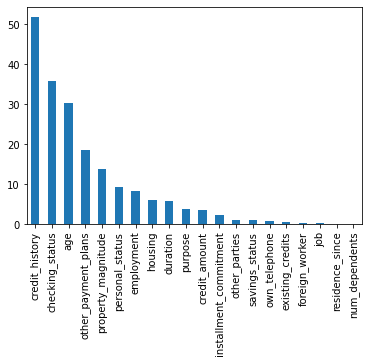

In [36]:
values.plot.bar()

In [35]:
pd.set_option('display.max_rows', values.shape[0])
values

credit_history            51.761998
checking_status           35.758955
age                       30.200309
other_payment_plans       18.465201
property_magnitude        13.647584
personal_status            9.347243
employment                 8.232742
housing                    6.064568
duration                   5.838249
purpose                    3.663943
credit_amount              3.471087
installment_commitment     2.204619
other_parties              0.993432
savings_status             0.900360
own_telephone              0.792551
existing_credits           0.495516
foreign_worker             0.249271
job                        0.240196
residence_since            0.003766
num_dependents             0.001031
dtype: float64

In [0]:
X =  df.drop(columns=['class','num_dependents'])
 

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rf = RandomForestClassifier(n_estimators=250)
scoring = ['accuracy','precision_macro', 'recall_macro', 'f1_macro','roc_auc']

scores = cross_validate(rf, X, y,cv=10, scoring=scoring)

print(scores['test_accuracy'])
print(scores['test_precision_macro'])
print(scores['test_recall_macro'])
print(scores['test_f1_macro'])
print(scores['test_roc_auc'])


[0.82 0.74 0.72 0.78 0.82 0.79 0.76 0.82 0.72 0.8 ]
[0.8030303  0.6875     0.65899123 0.75       0.8654485  0.81388152
 0.71875    0.8030303  0.65625    0.80505952]
[0.74761905 0.64285714 0.63809524 0.69047619 0.70952381 0.66904762
 0.66666667 0.74761905 0.6        0.6952381 ]
[0.76611227 0.65333333 0.64485033 0.70666667 0.73776224 0.68893497
 0.68       0.76611227 0.60474308 0.71767363]
[0.8147619  0.74880952 0.7847619  0.80428571 0.81619048 0.86666667
 0.7347619  0.84547619 0.79761905 0.79190476]
